# Live Yolo FPGA Demo

In [1]:
pip install ultralytics -qq

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
print(torch.cuda.is_available())

False


In [3]:
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO("yolov8n-cls.pt")

In [4]:
# Example: Dummy dataset with random data
from PIL import Image
import numpy as np

# Generate random images to simulate a dataset
def generate_dummy_images(num_images, size=(224, 224)):
    images = []
    for _ in range(num_images):
        array = np.random.randint(0, 255, size + (3,), dtype=np.uint8)
        images.append(Image.fromarray(array))
    return images

images = generate_dummy_images(1000)  # Generate 10 dummy images

In [5]:
from time import *
# Ensure GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Convert images to tensors and move to the appropriate device
processed_images = [torch.tensor(np.array(img).transpose(2, 0, 1), dtype=torch.float32) / 255.0 for img in images]
processed_images = [img.unsqueeze(0) for img in processed_images]  # Add batch dimension

# Batch the images
batch_size = 1000  # Adjust batch size for performance vs memory tradeoff
batches = [torch.cat(processed_images[i:i + batch_size], dim=0).to(device) for i in range(0, len(processed_images), batch_size)]

# Run inference and measure speed
times = []
for batch in batches:
    start_time = time()
    results = model.predict(batch)  # Let YOLO handle preprocessing and inference
    elapsed_time = time() - start_time
    times.append(elapsed_time)

# Display average speed
print(f"Average inference time per batch: {sum(times) / len(times):.4f} seconds")
print(f"Average speed: {len(images) / sum(times):.2f} images/second")

Using device: cpu

0: 224x224 paper_towel 0.07, dishrag 0.07, tennis_ball 0.06, velvet 0.05, screw 0.03, 3.6ms
1: 224x224 paper_towel 0.06, velvet 0.05, dishrag 0.04, tick 0.04, tennis_ball 0.03, 3.6ms
2: 224x224 dishrag 0.13, paper_towel 0.06, velvet 0.05, cardigan 0.05, tennis_ball 0.04, 3.6ms
3: 224x224 paper_towel 0.07, velvet 0.05, tick 0.05, dishrag 0.04, vulture 0.04, 3.6ms
4: 224x224 dishrag 0.11, velvet 0.05, paper_towel 0.04, tennis_ball 0.04, stole 0.04, 3.6ms
5: 224x224 paper_towel 0.07, tennis_ball 0.04, velvet 0.04, dishrag 0.04, tick 0.03, 3.6ms
6: 224x224 paper_towel 0.08, dishrag 0.06, tennis_ball 0.05, velvet 0.05, vulture 0.03, 3.6ms
7: 224x224 paper_towel 0.07, velvet 0.05, tennis_ball 0.05, dishrag 0.05, tick 0.03, 3.6ms
8: 224x224 paper_towel 0.07, velvet 0.07, dishrag 0.07, tennis_ball 0.04, tick 0.04, 3.6ms
9: 224x224 paper_towel 0.06, tennis_ball 0.06, dishrag 0.05, velvet 0.04, vulture 0.03, 3.6ms
10: 224x224 paper_towel 0.09, dishrag 0.07, velvet 0.05, tennis

In [6]:
main_dir = "C:/Users/lavat/Downloads/imagenetv2-top-images.tar/imagentv2_images/"

In [7]:
import os
import random

def get_random_picture(directory):
    """
    Returns the path to a random picture from the specified directory.

    Args:
        directory (str): The path to the directory containing images.

    Returns:
        str: The path to a random image file in the directory, or None if no images are found.
    """
    # List of supported image extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}

    # Get all files in the directory with supported image extensions
    images = [
        os.path.join(directory, file) 
        for file in os.listdir(directory) 
        if os.path.splitext(file)[1].lower() in image_extensions
    ]

    # Return a random image path if any are found, otherwise return None
    return random.choice(images) if images else None

# Example usage:
# directory_path = "/path/to/your/images"
# print(get_random_picture(directory_path))


In [8]:
image_path = get_random_picture(main_dir+"1")

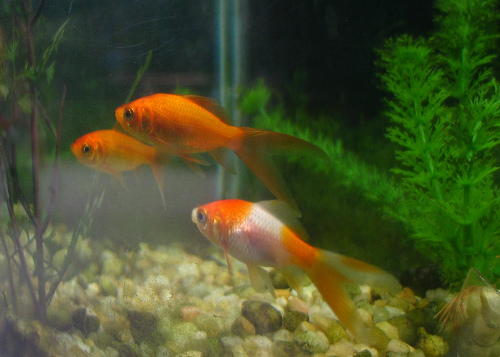

In [9]:
from IPython.display import Image, display

display(Image(filename=image_path))

In [10]:
results = model(image_path)  # predict on an image


image 1/1 C:\Users\lavat\Downloads\imagenetv2-top-images.tar\imagentv2_images\1\2fb7561b81c4e57499123d88ca1b3dfb90c12b04.jpeg: 224x224 goldfish 1.00, axolotl 0.00, tench 0.00, eft 0.00, puffer 0.00, 50.5ms
Speed: 4.0ms preprocess, 50.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


In [11]:
import cv2
import numpy as np
import struct

In [12]:
def letterbox(image, target_size=(640, 640), color=(114, 114, 114)):
    original_height, original_width = image.shape[:2]
    target_width, target_height = target_size

    # Calculate the scale factor and new width and height with aspect ratio preserved
    scale = min(target_width / original_width, target_height / original_height)
    new_width = int(original_width * scale)
    new_height = int(original_height * scale)

    # Resize the image with the aspect ratio maintained
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

    # Create a new image with the target size, filled with the padding color
    padded_image = np.full((target_height, target_width, 3), color, dtype=np.uint8)

    # Calculate top-left coordinates to center the resized image on the padding
    x_offset = (target_width - new_width) // 2
    y_offset = (target_height - new_height) // 2

    # Place the resized image onto the padded image
    padded_image[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_image

    return padded_image

In [13]:
import socket
send_address = ('192.168.0.225', 12345)
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

In [14]:
# Create a UDP socket
rxsock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

# Bind the socket to a specific address and port
server_address = ('192.168.0.33', 12345)
rxsock.bind(server_address)

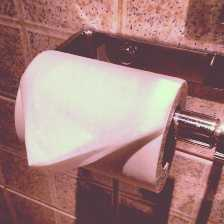

In [15]:
top_1_count = 0
top_5_count = 0
not_top_count = 0

fpga_1_count = 0
fpga_5_count = 0
fpga_top_count = 0


display_handle=display(None, display_id=True)

for i in range(1000):
    #printProgressBar(i,999)    
    image_path = get_random_picture(main_dir+str(i))
    im = cv2.imread(image_path)
    im = letterbox(im, target_size=(224,224))  
    _, encoded_frame = cv2.imencode('.jpeg', im,[cv2.IMWRITE_JPEG_QUALITY, 50])   

    #Display 
    display_handle.update(Image(data=encoded_frame.tobytes()))

    #LOCAL
    results = model(image_path, verbose=False)  # predict on an image
    image_class = results[0].summary()[0]["class"]
    probs = results[0].probs.data
    top_indices = sorted(range(len(probs)), key=lambda i: probs[i], reverse=True)
    if i!=image_class:
        index_of_expected = top_indices.index(i)
        #print("Not Top, ",i,image_class,index_of_expected)
        if index_of_expected < 5:
            top_5_count += 1
        else:
            not_top_count += 1
    else:
        top_1_count += 1

    #FPGA
    sock.sendto(encoded_frame, send_address)
    received_data, _ = rxsock.recvfrom(65536)
    # Decode and deserialize the data
    top_5_fpga = struct.unpack('!5i', received_data[:20])  # First 20 bytes are 5 integers
    float1, float2, float3 = struct.unpack('!fff', received_data[20:])  # Next 12 bytes are 3 floats
    #print(top_5_fpga,float1,float2,float3)
    if i!=top_5_fpga[0]:
        try:
            index_of_expected = top_5_fpga.index(i)
            #print("Not Top, ",i,image_class,index_of_expected)
            if index_of_expected < 5:
                fpga_5_count += 1
        except ValueError:
            fpga_top_count += 1
    else:
        fpga_1_count += 1


Difference in accruacy is only due to differen in image pre-processing

In [16]:
top_1_count,fpga_1_count

(716, 546)

In [17]:
top_5_count,fpga_5_count

(177, 224)

In [18]:
top_1_count+top_5_count,fpga_1_count+fpga_5_count

(893, 770)

TODO: Live compare execution times!